Random(I,t): compute and show bit panels of a random patch (positions and sizes) of I if t is even, otherwise 
show in half image the red channel and in the remaining part the blue channel (you can choose any fixed 
configuration of "half image" (high, low) (left,right), etc.).   

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
img = cv2.imread(r"C:\Users\andre\Pictures\211712.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[[['10110000' '10110011' '10010100']
  ['10110111' '10111100' '10011110']
  ['10111110' '11000011' '10100011']
  ...
  ['11110001' '11101001' '11011110']
  ['11101101' '11100101' '11011010']
  ['11101010' '11100100' '11011000']]

 [['10110011' '10110111' '10010110']
  ['10101111' '10110100' '10010110']
  ['10111001' '10111110' '10011110']
  ...
  ['11101011' '11100010' '11010011']
  ['11101111' '11100110' '11010111']
  ['11101011' '11100100' '11010100']]

 [['10110000' '10110001' '10001111']
  ['10111001' '10111100' '10011111']
  ['11000000' '11000001' '10100010']
  ...
  ['11011110' '11010011' '11000001']
  ['11101011' '11100011' '11010000']
  ['11100101' '11011101' '11001010']]

 ...

 [['01010001' '01100000' '00111001']
  ['01001110' '01011100' '01000010']
  ['00101110' '00111101' '00100110']
  ...
  ['01101101' '01100000' '01000000']
  ['01110000' '01100101' '01000101']
  ['01110011' '01101000' '01001000']]

 [['00111110' '01001101' '00100110']
  ['00110001' '00111111' '00100101']


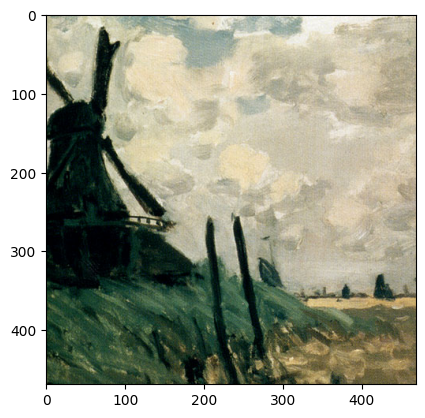

In [105]:
def Randomm(I,t):
    if t%2==0:
        nx=random.randint(0,img.shape[0])
        ny=random.randint(0,img.shape[1])
        x=random.randint(0,img.shape[0]-nx)
        y=random.randint(0,img.shape[1]-ny)
        img2=img[x:x+n,y:y+n,:].copy()
        plt.imshow(img2)
        binarize = np.vectorize(lambda x: format(x, 'b').zfill(8))(img2)
        print(binarize)
    else:
        imgR=img[:,:,0].copy()
        imgB=img[:,:,2].copy()
        img2=imgB.copy()
        img2[0:img.shape[0]//2,:]=imgR[0:img.shape[0]//2,:]
        plt.imshow(img2, cmap='gray')

Randomm(img,122)

2. RGB2YCbCr(I, ptOut): Given an image I as input: 
a. extract the RGB channels and convert them to YCbCr using OpenCV. 
imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) 
b. Randomly choose 3 channels (from the 6: R, G, B, Y, Cb, Cr) and merge them to create a new image. 
Show the resulting image. 
So for example we could get an image consisting of RYG or CbBG, etc.

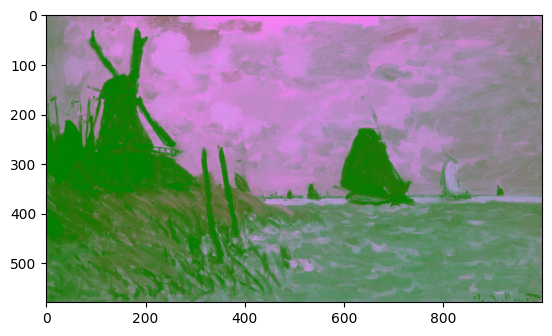

In [129]:
def RGB2YCbCr(I):
    imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    RandomChannels=([img[...,0],img[...,1],img[...,2],imgYCC[...,0],imgYCC[...,1],imgYCC[...,2]])
    imgF=img.copy()
    imgF[...,0]=random.choice(RandomChannels)
    imgF[...,1]=random.choice(RandomChannels)
    imgF[...,2]=random.choice(RandomChannels)
    plt.imshow(imgF)

RGB2YCbCr(img)

3. Swap-blocks(I): Divide the image into 5x5 non-overlapped blocks. For each block, swap the pixels of the main 
diagonal with those of the secondary diagonal (Fig (a)). Next, compute the "negative" of the remaining pixels. 

In [135]:
#making image multiple of 5
img2=img[0:img.shape[0]-(img.shape[0]%5),0:img.shape[1]-(img.shape[1]%5),:]
img2.shape


(575, 1000, 3)

In [147]:
import numpy as np
# Crea una matrice 10x10 di zeri
matrice = np.zeros((10, 10), dtype=int)
# Popola la diagonale principale con 1
np.fill_diagonal(matrice, 1)
for i in range(10):
    matrice[i, 9 - i] = 2

# Stampa la ma

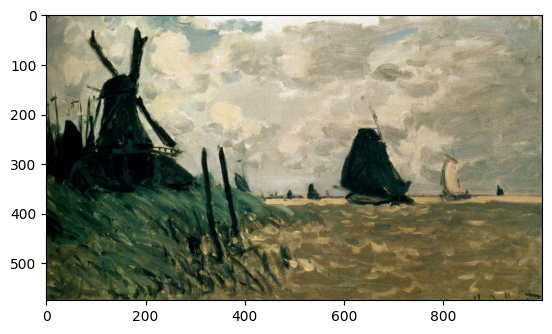

In [172]:
matr=img2.copy()
for a in range(matrice.shape[0]):
    for b in range(matrice.shape[1]):
        if a==b:
            matr[a,b]=matrice[a,matrice.shape[1]-1-b]
        elif a==matrice.shape[1]-1-b:
            matr[a,b]=matrice[matrice.shape[1]-1-a,b]

#print(matr)
plt.imshow(matr)

In [206]:
matr=img2[...,0].copy()
matr5=np.zeros((5,5), dtype=matr.dtype)

#print(matrice)

for A in range(0,matrice.shape[0],5):
    for B in range(0,matrice.shape[1],5):
        n=0
        for a in range(A, A+5):
            m=0
            for b in range(B, B+5):
                matr5[m,n]=matrice[a,b]
                m+=1
            n+=1
        matr5a=matr5.copy()
        for a in range(5):
            for b in range(5):
                if a==b:
                    matr5a[a,b]=matr5[a,matr5.shape[1]-1-b]
                elif a==matr5.shape[1]-1-b:
                    matr5a[a,b]=matr5[matr5.shape[1]-1-a,b]
                else:
                    matr5a[a,b]=255-matr5a[a,b]
            
                
        matr[A:A+5,B:B+5]=matr5a
        #print(matr5)
        #print(matr5a)

#print(matr)



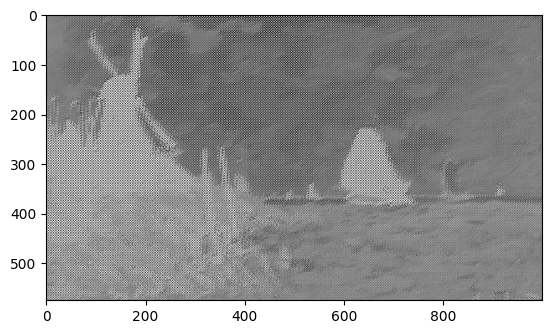

In [208]:
plt.imshow(matr, cmap='gray')

In [203]:
#Here it's the same but i put 0 on diagonals just to see the difference
matrice = img2[...,0].copy()
matr=img2[...,0].copy()
matr5=np.zeros((5,5), dtype=matr.dtype)

#print(matrice)

for A in range(0,matrice.shape[0],5):
    for B in range(0,matrice.shape[1],5):
        n=0
        for a in range(A, A+5):
            m=0
            for b in range(B, B+5):
                matr5[m,n]=matrice[a,b]
                m+=1
            n+=1
        matr5a=matr5.copy()
        for a in range(5):
            for b in range(5):
                if a==b:
                    matr5a[a,b]=0
                elif a==matr5.shape[1]-1-b:
                    matr5a[a,b]=0
                else:
                    matr5a[a,b]=255-matr5a[a,b]
                
        matr[A:A+5,B:B+5]=matr5a
        #print(matr5)
        #print(matr5a)

#print(matr)



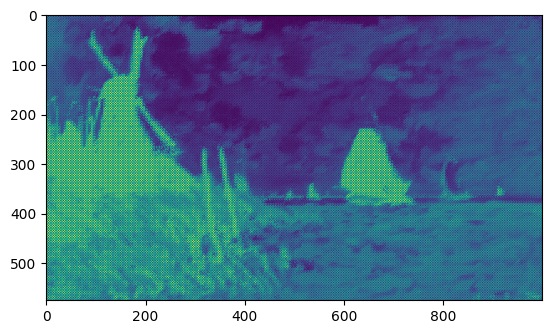

In [205]:
plt.imshow(matr)